In [1]:
!pip install diffusers transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 34.9 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
def load_model(pretrained_model_name_or_path, torch_dtype=torch.float16, device="cuda"):
    pipeline = DiffusionPipeline.from_pretrained(
        pretrained_model_name_or_path=pretrained_model_name_or_path,
        torch_dtype=torch_dtype,
        use_safetensors=True
    ).to(device)
    pipeline.enable_attention_slicing() # will help to improve memory usage
    return pipeline

In [4]:
def generate_image(pipeline, prompt):
    image = pipeline(prompt=prompt).images[0]
    return image

def show_image(image):
    plt.axis('off')
    plt.imshow(image)
    plt.show()

In [11]:
def main():
    pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
    prompt = "A photo realistic of a rottweiler with a black angel's wings flying in the sky"

    model = load_model(pretrained_model_or_path)

    generated_image = generate_image(model, prompt)
    show_image(generated_image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

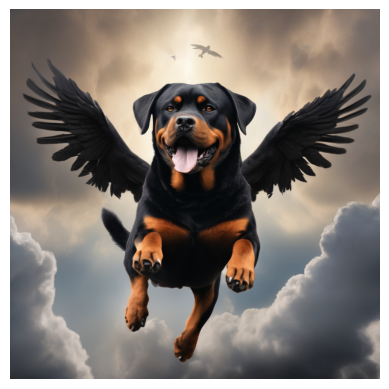

In [12]:
main()